## 回测代码

In [21]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import sys
import matplotlib.pyplot as plt

sys.path.append('/mnt/datadisk2/aglv/aglv/lab_aglv/forintern/')
from DataDaily import DataDaily

def factor_group(factor, group_number=10):
    '''按照因子值分组,grp1最小'''
    fg = factor.apply(
        lambda x: pd.qcut(x.rank(method='first'), q=group_number, labels=False) + 1, 
        axis=1)
    
    def _factor_group(factor_daily:pd.Series):
        dic = {f'group{str(g_value)}':factor_daily[factor_daily == g_value].index.tolist() for g_value in range(1, 1+group_number)}
        return pd.Series(dic)
    
    return {'group_stock':fg.apply(_factor_group, axis=1), 'group_index':fg}

def group_backtest(price:pd.DataFrame, factor:pd.DataFrame, group_number=10):
    '''
    分组回测,日度调仓  

    Para:
    price:日频价格数据,index:Date,
    factor:日度因子值,index:Date,
    group_number:分组数,默认值为10, 组数大的因子值大

    Return:
    index:日期, col:组别, value: 指定日期下指定组数的收益率
    '''
    factor = factor.set_index('Date')
    factor = factor.shift(1)
    factor = factor.drop(factor.index[0])
    
    ret = price / price.shift(1)
    ret = ret.loc[factor.index, factor.columns].fillna(1)

    fg = factor_group(factor, group_number=group_number)['group_index']
    
    dic = {}
    for g_value in tqdm(range(1, 1+group_number)):
        is_in_group = fg.applymap(lambda x: 1 if x == g_value else 0)
        group_ret_daily = (ret * is_in_group).sum(axis=1) / is_in_group.sum(axis=1)
        dic[f'group{g_value}'] = group_ret_daily

    g_ret = pd.DataFrame(dic)
    # g_ret['g_mean'] = g_ret.mean(axis=1)
    g_ret['benchmark'] = ret.mean(axis=1)

    return g_ret

def group_backtest_plot(price:pd.DataFrame, factor:pd.DataFrame, group_number=5, save_path=None):
    '''
    分组回测,日度调仓  
    Para:
    price:日频价格数据,index:Date,
    factor:日度因子值,index:Date,
    group_number:分组数,默认值为10, 组数大的因子值大
    '''
    g_ret = group_backtest(price=price, factor=factor, group_number=group_number)
    g_ret.index = [str(i) for i in g_ret.index]
    g_ret_cumsum = g_ret.cumprod()

    # index_data = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/index_data/close.csv')
    # index_data.set_index('Unnamed: 0', inplace=True)
    # zz1000 = index_data.loc[852, :]
    # zz1000 = zz1000.loc[g_ret.index]
    # zz1000_bt = zz1000 / zz1000.iloc[0]
    # g_ret_cumsum['zz1000'] = zz1000_bt
    
    plt.style.use('seaborn')
    g_ret_cumsum.iloc[:, :-1].plot(figsize=(12, 6), linewidth=1)
    plt.plot(g_ret_cumsum['benchmark'], linewidth=2)
    # plt.plot(zz1000_bt, linewidth=2)
    # plt.yticks(np.arange(-1, 1, 0.1))
    plt.legend()
    if save_path is not None:
        plt.savefig(save_path, facecolor='white', dpi=300)
    plt.show()

In [2]:
cd /mnt/datadisk2/aglv/aglv/lab_aglv/

/mnt/datadisk2/aglv/aglv/lab_aglv


In [3]:
datadaily = DataDaily()
close = datadaily.adjclose

load ./data_daily.h5...


100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


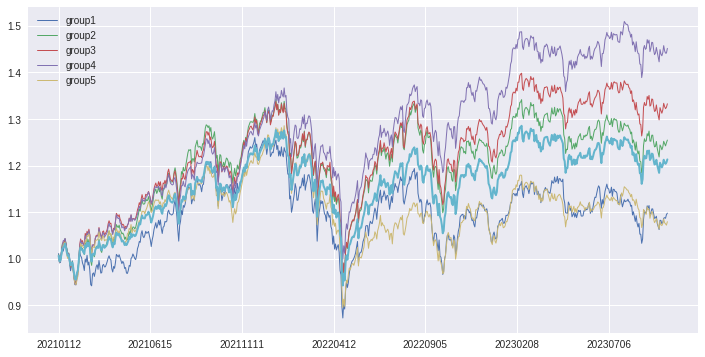

In [22]:
turn_fa_v3_nostop = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turnstd_r5mean_noavg_21_23_destop_min.csv')
# turn_fa_v3_nostop.index.names = ['Date']
group_backtest_plot(close, turn_fa_v3_nostop.iloc[5:, :])

100%|██████████| 5/5 [00:07<00:00,  1.47s/it]


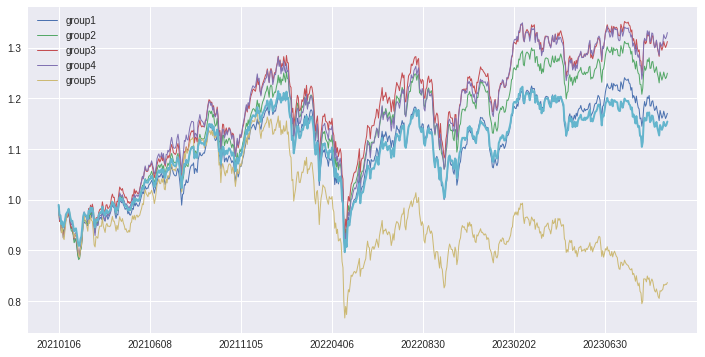

In [12]:
turn_cvar_posi_mul_ret_abs= pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turn_cvar_posi_mul-ret-abs_noavg_21_23_destop_min.csv')
# turn_cvar_posi_mul_ret_abs.index.names = ['Date']
group_backtest_plot(close, turn_cvar_posi_mul_ret_abs.iloc[1:, :])

100%|██████████| 5/5 [00:07<00:00,  1.49s/it]


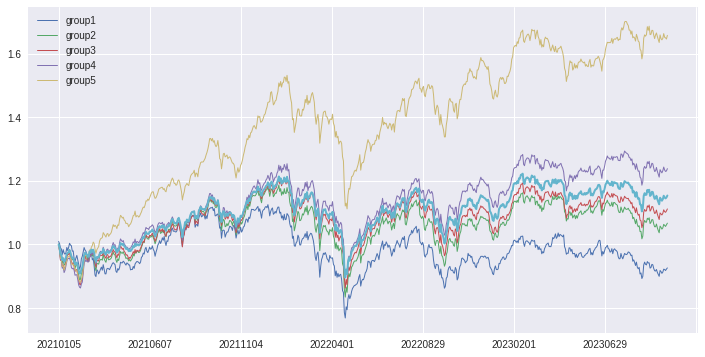

In [4]:
turn_cvar_posi_noavg_21_23_min = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turn_cvar_posi_noavg_21_23_min.csv')
group_backtest_plot(close, turn_cvar_posi_noavg_21_23_min)

100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


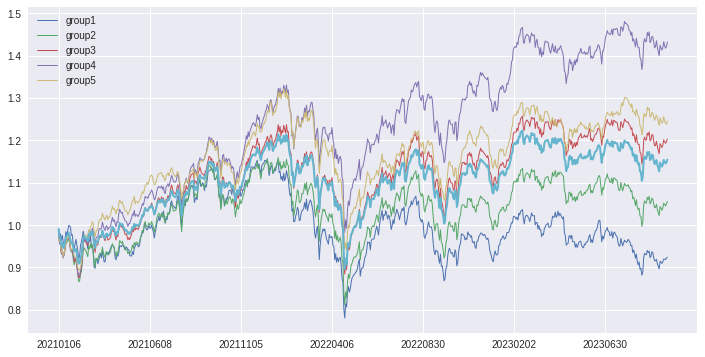

In [6]:
turn_cvar_posi_noavg_21_23_destop_min = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turn_cvar_posi_noavg_21_23_destop_min.csv')
group_backtest_plot(close, turn_cvar_posi_noavg_21_23_destop_min.iloc[1:, :])

100%|██████████| 5/5 [00:09<00:00,  1.88s/it]


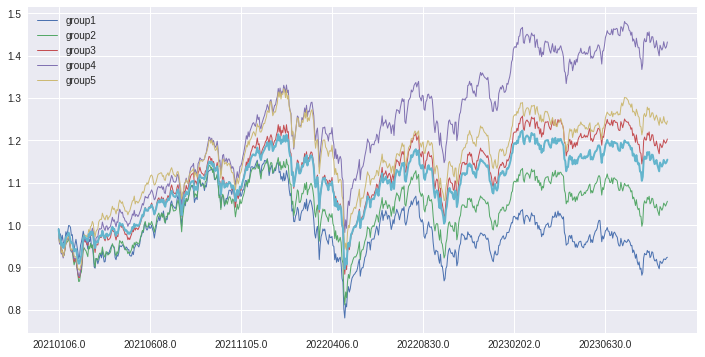

In [7]:
group_backtest_plot(close, turn_cvar_posi_noavg_21_23_destop_min.shift(-1).iloc[:-1, :])

In [ ]:
root = '/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/factor_829/inaday_cvar_neg_0.9_21_23_min.csv'
f1 = pd.read_csv(root)

In [ ]:
group_backtest_plot(close, f1)

In [ ]:
root2 = '/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/factor_829/longshort_v3_vol_ret_w15_21_23_min.csv'
f2 = pd.read_csv(root2)
group_backtest_plot(close, f2)

In [ ]:
f3 = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/factor_829/conti_up_T30_21_23_min.csv')
group_backtest_plot(close, f3)

In [ ]:
close

In [ ]:
turnstd_noavg = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turnstd_noavg_min.csv')
group_backtest_plot(close, turnstd_noavg)

In [ ]:
turnstd_avg20 = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turnstd_avg20d_min.csv')
group_backtest_plot(close, turnstd_avg20.iloc[20:])

In [ ]:
turn_std_21_23 = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turnstd_noavg_21_23min.csv')
group_backtest_plot(close, turn_std_21_23)

In [ ]:
turn_std_21_23_avg = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turnstd_avg20d_21_23min.csv')
group_backtest_plot(close, turn_std_21_23_avg.iloc[20:])

In [ ]:
turn_std_21_23_destop = pd.read_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/aglv_factor/Sep/turnstd_noavg_destiop_min.csv')
group_backtest_plot(close, turn_std_21_23_destop, group_number=10)